In [12]:
from datetime import date
from os import path
import re
import pandas as pd

In [13]:
df = pd.read_csv(path.join('data', 'jobs.csv'), index_col=[0])
df_with_technologies = df[~df['technologies'].isna()]
df_with_technologies.loc[:, ('technologies',)] = df_with_technologies['technologies'].explode()
df_with_technologies.loc[:, ('technologies',)] = (df_with_technologies['technologies']
                                                  .apply(lambda x: re.sub(r'\[|\]|\'', '', x)))
df_with_technologies.loc[:, ('technologies',)] = df_with_technologies['technologies'].str.split(", ")
df_with_technologies = df_with_technologies.explode('technologies')

today = date.today().strftime('%Y-%m-%d')

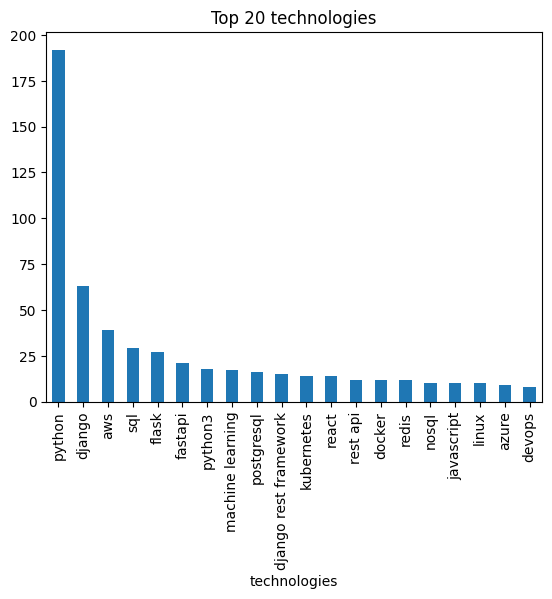

In [14]:
technology_counts = df_with_technologies['technologies'].value_counts()
fig = technology_counts[:20].plot(kind='bar', title='Top 20 technologies').get_figure()

image_path = path.join('history', 'all', f'bar-{today}')
fig.savefig(f'{image_path}.png', dpi=199, bbox_inches='tight')


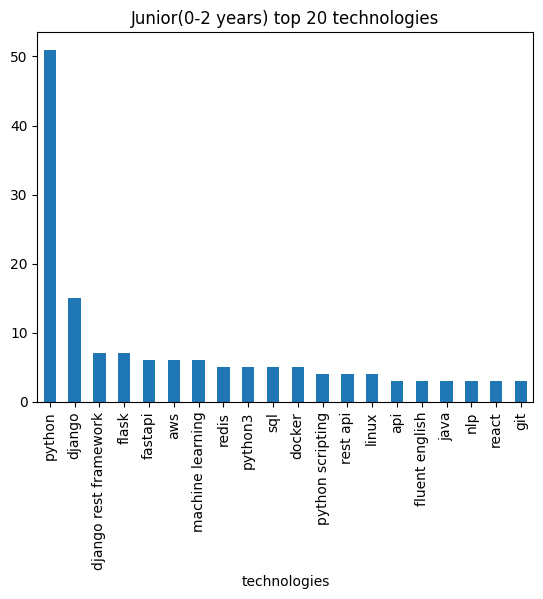

In [15]:
junior_jobs = df_with_technologies.loc[df_with_technologies['experience_years'] <= 2]
technology_counts_junior = junior_jobs['technologies'].value_counts()
fig = (technology_counts_junior[:20]
       .plot(kind='bar', title='Junior(0-2 years) top 20 technologies')
       .get_figure())

image_path = path.join('history', 'junior', f'bar-{today}')
fig.savefig(f'{image_path}.png', dpi=199, bbox_inches='tight')


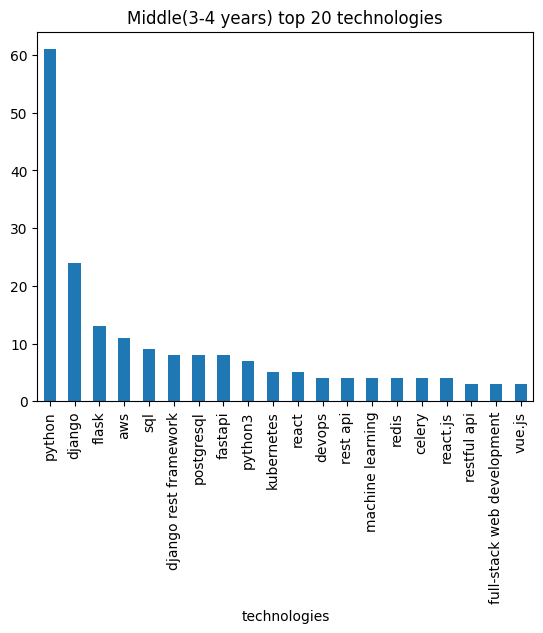

In [16]:
middle_jobs = df_with_technologies.loc[df_with_technologies['experience_years'].isin(range(3,5))]
technology_counts_middle = middle_jobs['technologies'].value_counts()
fig = (technology_counts_middle[:20]
       .plot(kind='bar', title='Middle(3-4 years) top 20 technologies')
       .get_figure())

image_path = path.join('history', 'middle', f'bar-{today}')
fig.savefig(f'{image_path}.png', dpi=199, bbox_inches='tight')

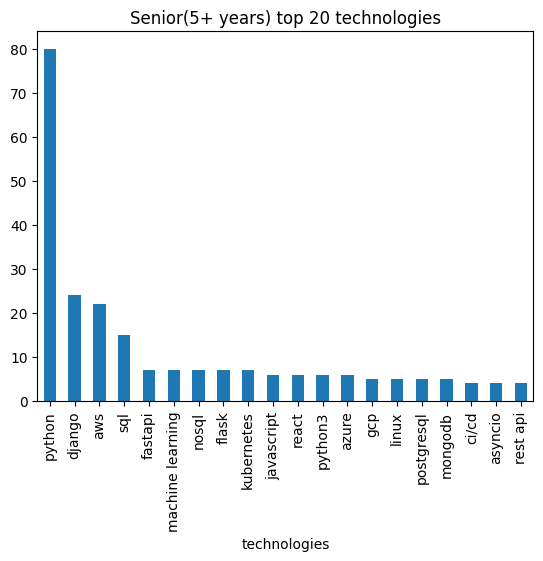

In [17]:
senior_jobs = df_with_technologies.loc[df_with_technologies['experience_years'] >= 5]
technology_counts_senior = senior_jobs['technologies'].value_counts()
fig = (technology_counts_senior[:20]
       .plot(kind='bar', title='Senior(5+ years) top 20 technologies')
       .get_figure())

image_path = path.join('history', 'senior', f'bar-{today}')
fig.savefig(f'{image_path}.png', dpi=199, bbox_inches='tight')

In [18]:
df[["experience_years", "views", "applications"]].corr()

,experience_years,views,applications
experience_years,1.000000,-0.608382,-0.553464
views,-0.608382,1.000000,0.896437
applications,-0.553464,0.896437,1.000000
